Data Collocation

In [1]:
# taamolat data set
taamolat_directory  = 'Authors Dataset/taamolat/'
TAAMOLAT_NUMBER_OF_AUTHORS = 7
TAAMOLAT_NUMBER_OF_SAMPLES_PER_AUTHOR = 10

# alaraby data set
alaraby_directory = 'Authors Dataset/alaraby/'
ALARABY_NUMBER_OF_AUTHORS = 9
ALARABY_NUMBER_OF_SAMPLES_PER_AUTHOR = 10

Function for return the list of authors names for a specific dataset

In [2]:
def get_authors_names(directory_name, number_of_authors):
    import configparser

    # Create a ConfigParser object
    config = configparser.ConfigParser()

    # save the authors names in a list
    authors = []
    for i in range(number_of_authors):
        # Read the properties file with the correct encoding (e.g., 'utf-8')
        with open(f'{directory_name}a{i}/a{i}_0.properties', encoding='utf-8') as f:
            # Add a default section header to the file
            content = '[default]\n' + f.read()
            config.read_string(content)

        # Get the author name
        # Get the value of the 'author_name' key
        author_name = config.get('default', 'author_name')
        authors.append(author_name)

    return authors

In [3]:
taamolat_authors_english = get_authors_names(taamolat_directory, TAAMOLAT_NUMBER_OF_AUTHORS)
# manually add the arabic names of the authors of the taamolat dataset
taamolat_authors_names = ['محمد عواد', 'محمد زينوبة', 'يونس جعدي', 'نور الدين رافع', 'عبير قلوطي', 'معتز خطيب', 'إبراهيم نصر الله']
taamolat_authors = [ i for i in range(TAAMOLAT_NUMBER_OF_AUTHORS) ]
alaraby_authors_names = get_authors_names(alaraby_directory, ALARABY_NUMBER_OF_AUTHORS)
alaraby_authors = [ i for i in range(TAAMOLAT_NUMBER_OF_AUTHORS, ALARABY_NUMBER_OF_AUTHORS + TAAMOLAT_NUMBER_OF_AUTHORS) ]

# print(taamolat_authors[0], taamolat_authors_names[0])
# print(alaraby_authors[0], alaraby_authors_names[0])

# print(taamolat_authors)
# print(alaraby_authors)

all_authors_names = taamolat_authors_names + alaraby_authors_names


Read the paragraphs of the authors 

In [4]:
# Get each paragraph with its author
def get_paragraphs_with_authors(directory_name, number_of_authors, number_of_samples_per_author, authors_names):
    paragraphs = []
    for i in range(number_of_authors):
        for j in range(number_of_samples_per_author):
            with open(f'{directory_name}a{i}/sample{j}.txt', encoding='utf-8') as file:
                current_paragraph = ''
    
                for line in file:
                    line = line.strip()
                
                    if line:  # If the line is not empty
                        current_paragraph += line + ' '
                    elif current_paragraph:  # If an empty line is encountered and there is a current paragraph
                        paragraphs.append((current_paragraph.strip(), authors_names[i]))
                        current_paragraph = ''

                if current_paragraph:  # Append the last paragraph if it exists after reaching the end of the file
                    paragraphs.append((current_paragraph.strip(), authors_names[i]))
    return paragraphs

In [5]:
taamolat_data = get_paragraphs_with_authors(taamolat_directory, TAAMOLAT_NUMBER_OF_AUTHORS, TAAMOLAT_NUMBER_OF_SAMPLES_PER_AUTHOR, taamolat_authors)
alaraby_data = get_paragraphs_with_authors(alaraby_directory, ALARABY_NUMBER_OF_AUTHORS, ALARABY_NUMBER_OF_SAMPLES_PER_AUTHOR, alaraby_authors)

# for paragraph in taamolat_data:
#     print(paragraph)
#     print()

# for paragraph in alaraby_data:
#     print(paragraph)
#     print()


# combine the two datasets
data_set = taamolat_data + alaraby_data
# make sure that the data is shuffled
import random
random.shuffle(data_set)

number_of_samples = len(data_set)


# for paragraph in data_set:
#     print(paragraph)
#     print()

Preprocessing The data sets

In [6]:

# Normalization: remove diacritics from the text & Punctuation mark removal & Numbers & Non-arabic & alef, teh 
def normalization(text):
    import re
    import tnkeeh
    from pyarabic.araby import strip_tashkeel, normalize_alef, normalize_teh
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)
    text = strip_tashkeel(text)
    text = normalize_alef(text)
    text = normalize_teh(text)
    tnkeeh_obj = tnkeeh.Tnkeeh(
    remove_special_chars=True,
    remove_english=True, normalize=True, remove_diacritics=True,
    remove_tatweel=True, remove_html_elements=True,
    remove_links=True, remove_twitter_meta=True
    )
    text = tnkeeh_obj.clean_raw_text(text)[0]
    
    return text

text = "يْشَارْ إِلَasfgى ةهأغإلأألأَنْ اللُّغَ15+62ة الْعَ?!#@$#^رْبِيَّة"
text = normalization(text)
print(text)





يشار الا ههاغالاالان اللغه العربيه


In [7]:

# stemming
def stemming(word):
    from nltk.stem.isri import ISRIStemmer # special stemmer for arabic
    # Create an instance of the ISRI Arabic Stemmer

    stemmer = ISRIStemmer()
    return stemmer.stem(word)

text = 'المدرسة'
result = stemming(text)
print(result)



درس


In [8]:
# POS tagging
def pos_tagging(text):

    # from farasa.pos import FarasaPOSTagger
    # tagger = FarasaPOSTagger()
    # tags = tagger.tag_segments(text, combine_subtokens=True)
    # return tags

    # import json
    # import requests
    # api_key = "mgmfGsWLmIFJznbMaC"

    # url = 'https://farasa.qcri.org/webapi/pos/'
    # payload = {'text': text, 'api_key': api_key}
    # data = requests.post(url, data=payload)
    # result = json.loads(data.text)

    # result = result['text']

    # words_pos_tags = []
    # for obj in result:
    #     words_pos_tags.append((obj['surface'], obj['POS']))

    # # remove the first and last elements of the list
    # words_pos_tags = words_pos_tags[1:-1]

    # return words_pos_tags
    pass


text = 'يُشار إلى أن اللغة العربية'
result = pos_tagging(text)
print(result)






None


In [9]:
# tokenization
def tokenization(text):
    from pyarabic.araby import tokenize
    
    text = tokenize(text)
    return text

text = 'يُشار إلى أن اللغة العربية'

result = tokenization(text)
print(result)



['يُشار', 'إلى', 'أن', 'اللغة', 'العربية']


Arabic Stop Words

In [10]:
from nltk.corpus import stopwords

stop_words_file_name = 'stop_words.txt'
stop_words = []
with open(stop_words_file_name, encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        stop_words.append(line)

stop_words = list(set(stop_words))
stop_words += stopwords.words('arabic')

# print(stop_words)

In [11]:
def remove_stop_words(words, stop_words=stop_words):
    
    result = [] 
    removed_indexes = []
    for i in range(len(words)):
        if words[i] in stop_words:
            removed_indexes.append(i)
        else:
            result.append(words[i])
        
    removed_indexes.sort(reverse=True) # for save remove of pos tagging 
    return result, removed_indexes

# remove_stop_words(['هذا', 'هو', 'من', 'الكلمات', 'المستبعدة', 'من', 'التحليل'])

Preprocessing: at the beginning we made normlization for the text, then make tokenization for remove the stop words and apply stemming on the words without stop words, 
after that find the pos tagging on the normalized text with stop words to make corrcot results, the remove the pos tags of the stop words, and just save the stemming words with thier pos tagging

In [12]:

# def preprocessing(text):
#     normalization_text = normalization(text)
#     segments = tokenization(normalization_text)

#     # remove stop words from the the text after normalization
#     words, removed_indexes = remove_stop_words(segments)
#     number_of_words = len(words)
    
#     # find the pos tags for the words in the original text after normalization
#     tags = pos_tagging(normalization_text)
   

#     # remove the tags of the stop words
#     for index in removed_indexes:
#         tags.pop(index)

#     # stemming for the words in the original text after tokenization without stop words
#     for i in range(number_of_words):
#         words[i] = stemming(words[i])

#     sample = []

#     # combine the stemming words with their pos tags
#     for i in range(number_of_words):
#         sample.append((words[i], tags[i][1]))

    
#     return sample


def preprocessing(text):
    normalization_text = normalization(text)
    segments = tokenization(normalization_text)

    # remove stop words from the the text after tokenization
    words, _ = remove_stop_words(segments)
    number_of_words = len(words)
    
    
    # stemming for the words in the original text after tokenization without stop words
    for i in range(number_of_words):
        words[i] = stemming(words[i])

 
    return words




# text = "أهلاً بكم! هذه الجملة تحتاج للتنظيف. 123"

# result = preprocessing(text)
# print(result)
# for word in result:
#     print(word)

Preprocessing our dataset

In [13]:
for i in range(number_of_samples):
    data_set[i] = (preprocessing(data_set[i][0]), data_set[i][1]) # (words, author)

# print(data_set)
# for sample in data_set:
#     print(sample)
#     print()

Features Extraction

In [14]:


class TFIDFExtractor:
    def __init__(self):
        from sklearn.feature_extraction.text import TfidfVectorizer
        self.vectorizer = TfidfVectorizer()
        self.feature_names = None
        self.author_names = None

    def fit_transform(self, corpus):
        # Extract the sentences from the corpus
        sentences = [sample[0] for sample in corpus]

        # Extract the authors from the corpus
        authors = [sample[1] for sample in corpus]

        # Convert the sentences to strings
        sentences = [' '.join(sentence) for sentence in sentences]

        # Fit and transform the sentences
        tfidf_matrix = self.vectorizer.fit_transform(sentences)

        # Get the feature names (unique words) as columns
        self.feature_names = self.vectorizer.get_feature_names()

        # Get the author names as rows
        self.author_names = authors

        return tfidf_matrix.toarray()

    def transform(self, corpus):
        # Extract the sentences from the corpus
        sentences = [sample[0] for sample in corpus]

        # Convert the sentences to strings
        sentences = [' '.join(sentence) for sentence in sentences]

        # Transform the sentences
        tfidf_matrix = self.vectorizer.transform(sentences)

        return tfidf_matrix.toarray()

    def get_feature_names(self):
        return self.feature_names
    
    def get_author_names(self):
        return self.author_names


In [15]:
# TF-IDF
tf_idf = TFIDFExtractor()



In [16]:

class WordEmbeddingExtractor:
    def __init__(self, vector_size=100, window=10, min_count=1, workers=4, sg=0):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.sg = sg
        self.model = None
        self.feature_names = None
        self.author_names = None

    def fit_transform(self, corpus):
        from gensim.models import FastText
        import numpy as np
        # Extract the sentences from the corpus
        sentences = [sample[0] for sample in corpus]

        # Extract the authors from the corpus
        authors = [sample[1] for sample in corpus]

        # Train FastText model
        self.model = FastText(sentences, vector_size=self.vector_size, window=self.window,
                              min_count=self.min_count, workers=self.workers, sg=self.sg)

        # Get the feature names (labeled dimensions) for FastText
        self.feature_names = [f't{i}' for i in range(self.vector_size)]

        # Get the author names as rows
        self.author_names = authors

        # Create feature vectors for each sentence
        feature_vectors = []
        for sentence in sentences:
            vectors = [self.model.wv[word] for word in sentence if word in self.model.wv]
            if vectors:
                sentence_vector = np.mean(vectors, axis=0)
            else:
                sentence_vector = np.zeros(self.vector_size)
            feature_vectors.append(sentence_vector)

        # Convert feature vectors to NumPy array
        feature_vectors = np.array(feature_vectors)

        return feature_vectors

    def transform(self, corpus):
        import numpy as np
        # Extract the sentences from the corpus
        sentences = [sample[0] for sample in corpus]

        # Create feature vectors for each sentence
        feature_vectors = []
        for sentence in sentences:
            vectors = [self.model.wv[word] for word in sentence if word in self.model.wv]
            if vectors:
                sentence_vector = np.mean(vectors, axis=0)
            else:
                sentence_vector = np.zeros(self.vector_size)
            feature_vectors.append(sentence_vector)

        # Convert feature vectors to NumPy array
        feature_vectors = np.array(feature_vectors)

        return feature_vectors

    def get_feature_names(self):
        return self.feature_names
    
    def get_author_names(self):
        return self.author_names


In [17]:


fast_text = WordEmbeddingExtractor(vector_size=100, window=10, min_count=1, workers=4, sg=0)


Combine features vectors (TF-IDF + FastText)

In [18]:
tf_idf_matrix = tf_idf.fit_transform(data_set)
tf_idf_feature_names, authors_list = tf_idf.get_feature_names(), tf_idf.get_author_names()
word_embedding_matrix = fast_text.fit_transform(data_set)
word_embedding_feature_names, authors_list = fast_text.get_feature_names(), fast_text.get_author_names()



# Combine the feature names
combined_feature_names = tf_idf_feature_names + word_embedding_feature_names

def combine_feature_vectors(x, y):
    import numpy as np
    # Combine the feature vectors
    return np.concatenate((x, y), axis=1)

# Combine the TF-IDF matrix and FastText feature vectors
combined_features_vectors = combine_feature_vectors(tf_idf_matrix, word_embedding_matrix)


# Create a list of tuples for feature vector-author mapping
features_vectors_matrix = list(zip(combined_features_vectors, authors_list))

print(len(features_vectors_matrix[0][0]))



C:\Users\swata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


6276


Processing Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features_vectors, authors_list, test_size=0.2, random_state=42)




In [20]:
def evaluation(model, X_test, y_test):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
    # Predict the labels for the test data
    y_pred = model.predict(X_test)

    # Calculate the precision
    precision = precision_score(y_test, y_pred, average='macro')

    # Calculate the recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy

    

   

In [21]:
from sklearn.svm import SVC

# Create and train the SVM model with the RBF kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
precision, recall, f1, accuracy = evaluation(svm_model, X_test, y_test)

print(f'SVM Precision: {precision:.4f}')
print(f'SVM Recall: {recall:.4f}')
print(f'SVM F1 score: {f1:.4f}')
print(f'SVM Accuracy: {accuracy:.4f}')


SVM Precision: 0.8880
SVM Recall: 0.7488
SVM F1 score: 0.7917
SVM Accuracy: 0.7868


In [22]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
precision, recall, f1, accuracy = evaluation(logreg_model, X_test, y_test)

print(f'Logistic Regression Precision: {precision:.4f}')
print(f'Logistic Regression Recall: {recall:.4f}')
print(f'Logistic Regression F1 score: {f1:.4f}')
print(f'Logistic Regression Accuracy: {accuracy:.4f}')


Logistic Regression Precision: 0.7886
Logistic Regression Recall: 0.5501
Logistic Regression F1 score: 0.5754
Logistic Regression Accuracy: 0.6646


C:\Users\swata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\swata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resul

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
precision, recall, f1, accuracy = evaluation(rf_model, X_test, y_test)

print(f'Random Forest Precision: {precision:.4f}')
print(f'Random Forest Recall: {recall:.4f}')
print(f'Random Forest F1 score: {f1:.4f}')
print(f'Random Forest Accuracy: {accuracy:.4f}')


Random Forest Precision: 0.6661
Random Forest Recall: 0.5136
Random Forest F1 score: 0.5354
Random Forest Accuracy: 0.5549


In [24]:
from sklearn.neighbors import KNeighborsClassifier


# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
precision, recall, f1, accuracy = evaluation(knn_model, X_test, y_test)

print(f'KNN Precision: {precision:.4f}')
print(f'KNN Recall: {recall:.4f}')
print(f'KNN F1 score: {f1:.4f}')
print(f'KNN Accuracy: {accuracy:.4f}')




KNN Precision: 0.8102
KNN Recall: 0.7817
KNN F1 score: 0.7797
KNN Accuracy: 0.7743


In [25]:
from sklearn.neural_network import MLPClassifier  # FOR CREATE NEURAL NETWORK MODEL

# Create and train the MLP model
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
precision, recall, f1, accuracy = evaluation(mlp_model, X_test, y_test)

print(f'MLP Precision: {precision:.4f}')
print(f'MLP Recall: {recall:.4f}')
print(f'MLP F1 score: {f1:.4f}')
print(f'MLP Accuracy: {accuracy:.4f}')



MLP Precision: 0.9024
MLP Recall: 0.7961
MLP F1 score: 0.8236
MLP Accuracy: 0.8213


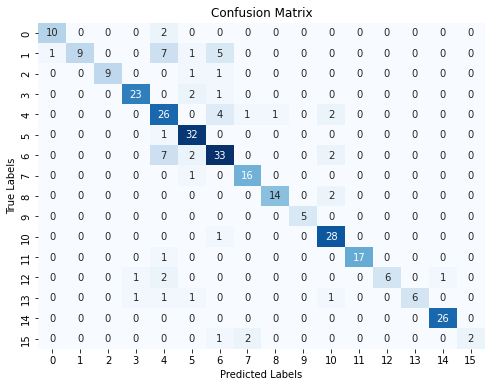

In [27]:
def confusion_matrix_plot(true_labels, predicted_labels):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()


confusion_matrix_plot(y_test, y_pred_mlp)

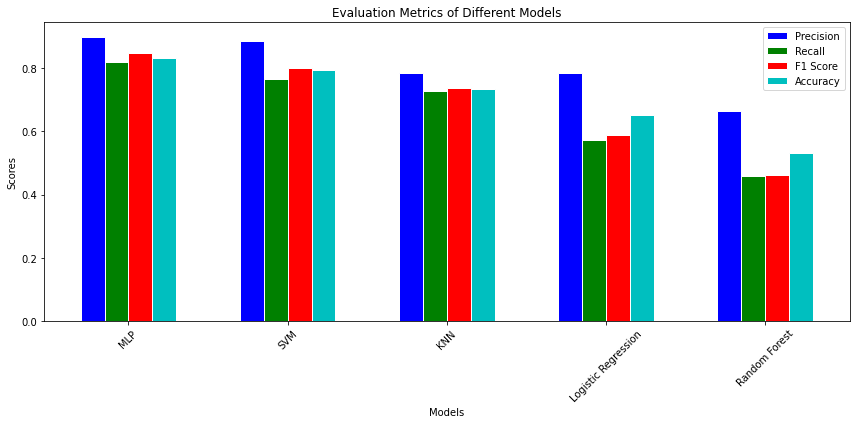

In [ ]:

# evaluation of all models
def evaluation():
    import numpy as np
    import matplotlib.pyplot as plt

    # Model names
    models = ['SVM', 'Logistic Regression', 'Random Forest', 'KNN', 'MLP']

    # Evaluation metrics
    precision = [0.8869, 0.7839, 0.6656, 0.7834, 0.9001]
    recall = [0.7649, 0.5731, 0.4586, 0.7266, 0.8197]
    f1_scores = [0.7993, 0.5900, 0.4610, 0.7367, 0.8471]
    accuracy = [0.7931, 0.6520, 0.5329, 0.7335, 0.8339]

    # Sort the models based on F1 scores
    sorted_data = sorted(zip(models, f1_scores, precision, recall, accuracy), key=lambda x: x[1], reverse=True)
    models, f1_scores, precision, recall, accuracy = zip(*sorted_data)

    # Set the width of the bars
    bar_width = 0.15

    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(models))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(r1, precision, color='b', width=bar_width, edgecolor='white', label='Precision')
    plt.bar(r2, recall, color='g', width=bar_width, edgecolor='white', label='Recall')
    plt.bar(r3, f1_scores, color='r', width=bar_width, edgecolor='white', label='F1 Score')
    plt.bar(r4, accuracy, color='c', width=bar_width, edgecolor='white', label='Accuracy')

    # Add xticks and labels
    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title('Evaluation Metrics of Different Models')
    plt.xticks([r + bar_width*1.5 for r in range(len(models))], models, rotation=45)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

evaluation()


In [ ]:
def modeling(text, model):
    processed_text = preprocessing(text)
    tf_idf_vector = tf_idf.transform([(processed_text, 0)])
    word_embedding_vector = fast_text.transform([(processed_text, 0)])
    combined_features_vector = combine_feature_vectors(tf_idf_vector, word_embedding_vector)
    return model.predict(combined_features_vector)
    

For check different texts from same authors or not

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define the available models
models = {
    'SVM Model': svm_model,
    'KNN Model': knn_model,
    'Random Forest Model': rf_model,
    'Logistic Regression Model': logreg_model,
    'MLP Model': mlp_model
}

# Create the dropdown widget
model_dropdown = widgets.Dropdown(options=models.keys(), description='Model:')

def process_text(btn):
    input_text1 = input_field1.value.strip()  # Get input text from the first text field
    input_text2 = input_field2.value.strip()  # Get input text from the second text field

    # Get the selected model
    selected_model = models[model_dropdown.value]

    text1_result = modeling(input_text1, selected_model)[0]  # Get the result for the first text
    text2_result = modeling(input_text2, selected_model)[0] # Get the result for the second text


    author1 = all_authors_names[text1_result]
    author2 = all_authors_names[text2_result]

    # Display the results
    result_label.value = f'Result: {"Same Author" if author1 == author2 else "Different Authors "} Text 1 is written by {author1} and Text 2 is written by {author2}'


# Create the labels
label1 = widgets.Label(value='Text 1:')
label2 = widgets.Label(value='Text 2:')
result_label = widgets.Label(value='Result:', layout=widgets.Layout(width='1000px'))

# Create the input fields
input_field1 = widgets.Textarea(value='', rows=5, layout=widgets.Layout(width='400px'))
input_field2 = widgets.Textarea(value='', rows=5, layout=widgets.Layout(width='400px'))

# Create the button
button = widgets.Button(description='Process')
button.on_click(process_text)

# Display the GUI elements
display(label1, input_field1, label2, input_field2, model_dropdown, button, result_label)


Label(value='Text 1:')

Textarea(value='', layout=Layout(width='400px'), rows=5)

Label(value='Text 2:')

Textarea(value='', layout=Layout(width='400px'), rows=5)

Dropdown(description='Model:', options=('SVM Model', 'KNN Model', 'Random Forest Model', 'Logistic Regression …

Button(description='Process', style=ButtonStyle())

Label(value='Result:', layout=Layout(width='1000px'))

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define the available models
models = {
    'SVM Model': svm_model,
    'KNN Model': knn_model,
    'Random Forest Model': rf_model,
    'Logistic Regression Model': logreg_model,
    'MLP Model': mlp_model
}

# Create the dropdown widget
model_dropdown = widgets.Dropdown(options=models.keys(), description='Model:')

def process_text(btn):
    input_text1 = input_field1.value.strip()  # Get input text from the first text field

     # Get the selected model
    selected_model = models[model_dropdown.value]

    text1_result = modeling(input_text1, selected_model)[0]  # Get the result for the first text


    author1 = all_authors_names[text1_result]

    # Display the results
    result_label.value = f'Result: the Text is written by {author1}'


# Create the labels
label1 = widgets.Label(value='Text:')

result_label = widgets.Label(value='Result:', layout=widgets.Layout(width='1000px'))

# Create the input fields
input_field1 = widgets.Textarea(value='', rows=5, layout=widgets.Layout(width='400px'))

# Create the button
button = widgets.Button(description='Process')
button.on_click(process_text)

# Display the GUI elements
display(label1, input_field1, model_dropdown, button, result_label)


Label(value='Text:')

Textarea(value='', layout=Layout(width='400px'), rows=5)

Dropdown(description='Model:', options=('SVM Model', 'KNN Model', 'Random Forest Model', 'Logistic Regression …

Button(description='Process', style=ButtonStyle())

Label(value='Result:', layout=Layout(width='1000px'))